# Implementation of Decision Tree in Python
## Import required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as st
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss

## Read breast cancer dataset from sklearn datasets

In [2]:
raw_data = load_breast_cancer()
breast_cancer_df = pd.DataFrame(raw_data["data"], columns = raw_data["feature_names"])
breast_cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
cancer_type_df = pd.DataFrame(raw_data["target"], columns = ["Cancer Type"])
cancer_type_df

,Cancer Type
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [4]:
cancer_type_df['Cancer Type'].unique()

array([0, 1])

The response variable is binary.

## Check multicolinearity

<AxesSubplot:>

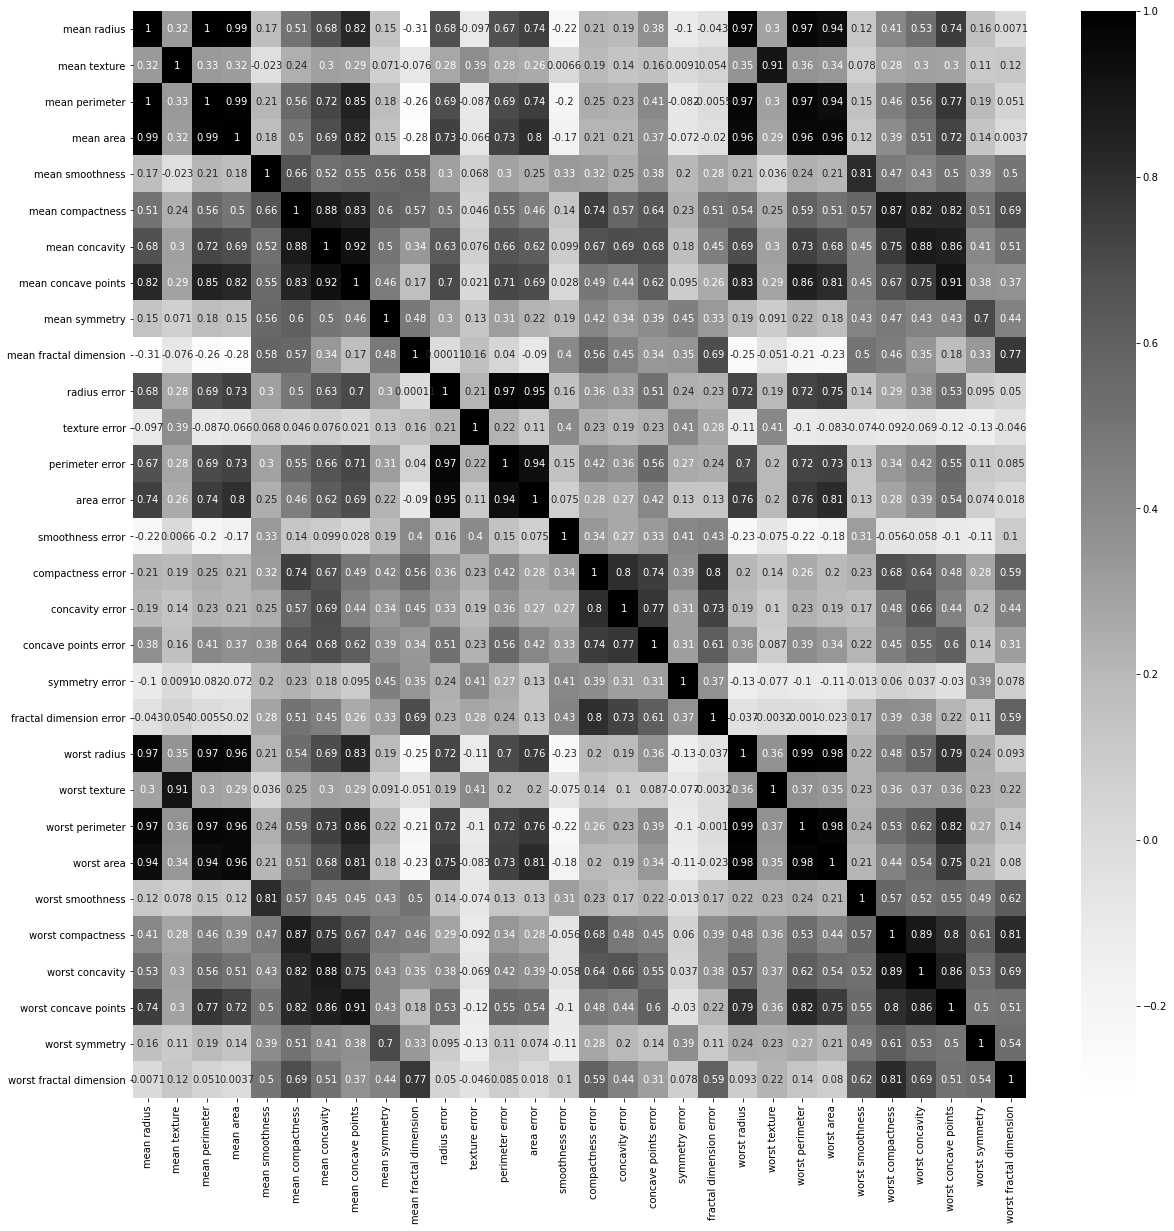

In [5]:
plt.figure(figsize=(20,20))
sns.heatmap(breast_cancer_df.corr(),annot=True,cmap="Greys")

In [6]:
Highly_correlated_df = pd.DataFrame(columns=['Feature 1','Feature 2','Correlation Coefficient'])
correlation_mat = breast_cancer_df.corr()
columns = correlation_mat.columns
correlation_mat.shape[1]
for row in range(correlation_mat.shape[0]):
    for col in range(correlation_mat.shape[1]): 
        if correlation_mat.iloc[row][col]>0.9 and correlation_mat.index[row]!= columns[col]:
            Highly_correlated_df = Highly_correlated_df.append({'Feature 1':correlation_mat.index[row],'Feature 2':columns[col],'Correlation Coefficient':correlation_mat.iloc[row][col]}, ignore_index=True)
            
table = pd.pivot_table(Highly_correlated_df,index=['Feature 1','Feature 2'])
table

Correlation Coefficient
Feature 1            Feature 2                                    
area error           perimeter error                      0.937655
                     radius error                         0.951830
mean area            mean perimeter                       0.986507
                     mean radius                          0.987357
                     worst area                           0.959213
                     worst perimeter                      0.959120
                     worst radius                         0.962746
mean concave points  mean concavity                       0.921391
                     worst concave points                 0.910155
mean concavity       mean concave points                  0.921391
mean perimeter       mean area                            0.986507
                     mean radius                          0.997855
                     worst area                           0.941550
                     worst perimeter                      0.970387
                     worst radius                         0.969476
mean radius          mean area                            0.987357
                     mean perimeter                       0.997855
                     worst area                           0.941082
                     worst perimeter                      0.965137
                     worst radius                         0.969539
mean texture         worst texture                        0.912045
perimeter error      area error                           0.937655
                     radius error                         0.972794
radius error         area error                           0.951830
                     perimeter error                      0.972794
worst area           mean area                            0.959213
                     mean perimeter                       0.941550
                     mean radius                          0.941082
                     worst perimeter                      0.977578
                     worst radius                         0.984015
worst concave points mean concave points                  0.910155
worst perimeter      mean area                            0.959120
                     mean perimeter                       0.970387
                     mean radius                          0.965137
                     worst area                           0.977578
                     worst radius                         0.993708
worst radius         mean area                            0.962746
                     mean perimeter                       0.969476
                     mean radius                          0.969539
                     worst area                           0.984015
                     worst perimeter                      0.993708
worst texture        mean texture                         0.912045

From above correlation matrix, we found set of independent variables which are highly correlated with each other:
1. mean radius, mean perimeter, mean area, worst radius, worst perimeter, worst area
2. mean texture, worst texture
3. mean concavity, mean concave points
4. mean concave points, mean concavity, worst concave points
5. raduis error, perimeter error, area error.

mean perimeter and mean radius has maximum VIF score.
It means that our dataset contains multicollinearity. We should remove multicollinearity by dropping columns which has high correlation.
This observation will be helpful to evaluate the performance of the model using AIC.

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = breast_cancer_df
VIF_data = pd.DataFrame()
VIF_data['feature'] = X.columns
# calculating VIF for each feature
VIF_data['VIF score'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
VIF_data.sort_values('VIF score').head()

,feature,VIF score
11,texture error,24.675367
14,smoothness error,26.170243
19,fractal dimension error,27.532631
16,concavity error,33.244099
18,symmetry error,37.176452


In [8]:
breast_cancer_new_df=breast_cancer_df.drop(columns = ['mean radius', 'mean perimeter', 'mean area', 'worst radius', 'worst perimeter', 'worst area','mean texture', 'worst texture','mean concavity', 'mean concave points','mean concave points', 'mean concavity', 'worst concave points','radius error', 'perimeter error', 'area error','texture error','worst compactness'], axis = 1)
breast_cancer_new_df

,mean smoothness,mean compactness,mean symmetry,mean fractal dimension,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst smoothness,worst concavity,worst symmetry,worst fractal dimension
0,0.11840,0.27760,0.2419,0.07871,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,0.16220,0.7119,0.4601,0.11890
1,0.08474,0.07864,0.1812,0.05667,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,0.12380,0.2416,0.2750,0.08902
2,0.10960,0.15990,0.2069,0.05999,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,0.14440,0.4504,0.3613,0.08758
3,0.14250,0.28390,0.2597,0.09744,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,0.20980,0.6869,0.6638,0.17300
4,0.10030,0.13280,0.1809,0.05883,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,0.13740,0.4000,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.11100,0.11590,0.1726,0.05623,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,0.14100,0.4107,0.2060,0.07115
565,0.09780,0.10340,0.1752,0.05533,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,0.11660,0.3215,0.2572,0.06637
566,0.08455,0.10230,0.1590,0.05648,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,0.11390,0.3403,0.2218,0.07820
567,0.11780,0.27700,0.2397,0.07016,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,0.16500,0.9387,0.4087,0.12400


<AxesSubplot:>

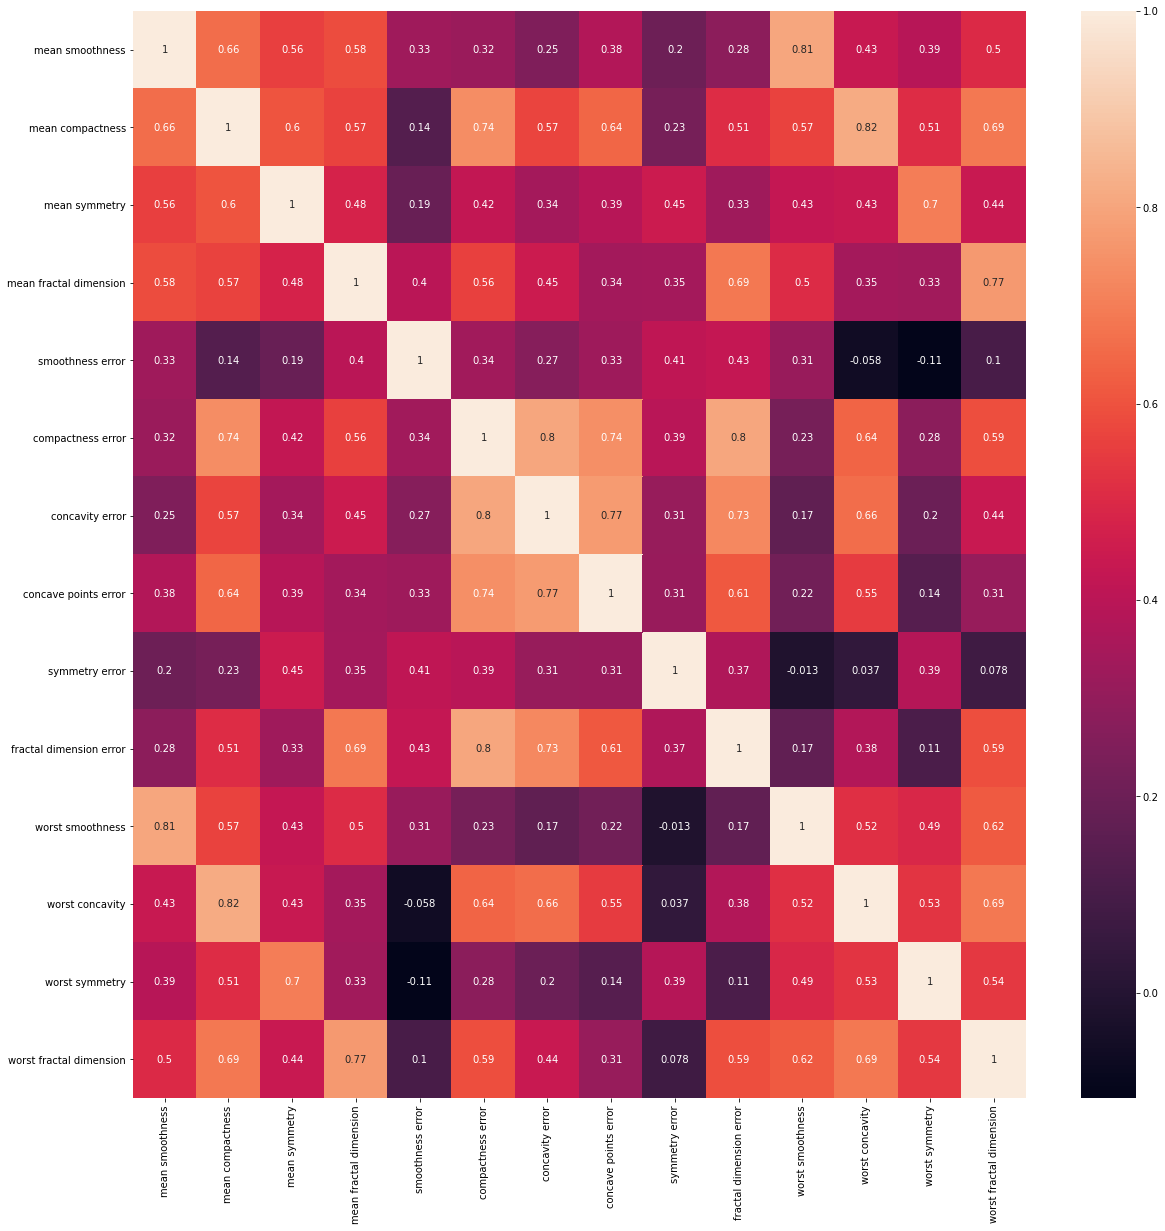

In [9]:
plt.figure(figsize=(20,20))
sns.heatmap(breast_cancer_new_df.corr(),annot=True)

## All observations are independent of each other.

In [11]:
import scipy.stats as stats
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(breast_cancer_new_df)
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 1.0
Independent (H0 holds true)


## There are No Extreme Outliers.

In [12]:
breast_cancer_new_df.columns

Index(['mean smoothness', 'mean compactness', 'mean symmetry',
       'mean fractal dimension', 'smoothness error', 'compactness error',
       'concavity error', 'concave points error', 'symmetry error',
       'fractal dimension error', 'worst smoothness', 'worst concavity',
       'worst symmetry', 'worst fractal dimension'],
      dtype='object')

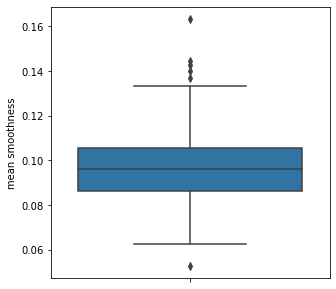

In [13]:
plt.subplots(1, figsize=(5,5))
sns.boxplot(y = breast_cancer_new_df['mean smoothness'])
plt.show()

In [14]:
temp_df  = breast_cancer_new_df
temp_df['Cancer Type'] = cancer_type_df['Cancer Type'] 
temp_df

,mean smoothness,mean compactness,mean symmetry,mean fractal dimension,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst smoothness,worst concavity,worst symmetry,worst fractal dimension,Cancer Type
0,0.11840,0.27760,0.2419,0.07871,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,0.16220,0.7119,0.4601,0.11890,0
1,0.08474,0.07864,0.1812,0.05667,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,0.12380,0.2416,0.2750,0.08902,0
2,0.10960,0.15990,0.2069,0.05999,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,0.14440,0.4504,0.3613,0.08758,0
3,0.14250,0.28390,0.2597,0.09744,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,0.20980,0.6869,0.6638,0.17300,0
4,0.10030,0.13280,0.1809,0.05883,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,0.13740,0.4000,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.11100,0.11590,0.1726,0.05623,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,0.14100,0.4107,0.2060,0.07115,0
565,0.09780,0.10340,0.1752,0.05533,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,0.11660,0.3215,0.2572,0.06637,0
566,0.08455,0.10230,0.1590,0.05648,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,0.11390,0.3403,0.2218,0.07820,0
567,0.11780,0.27700,0.2397,0.07016,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,0.16500,0.9387,0.4087,0.12400,0


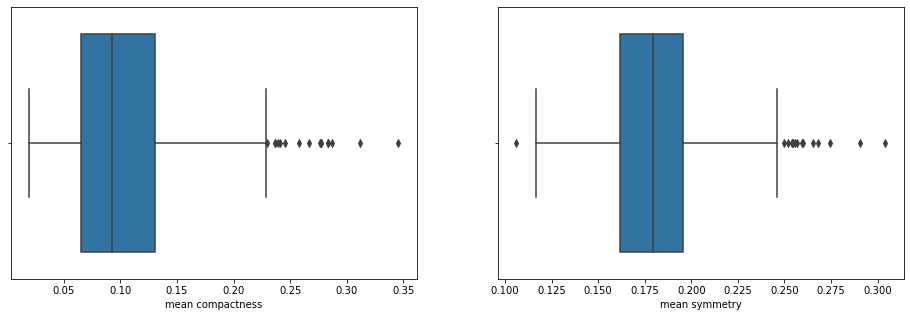

In [15]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.boxplot(breast_cancer_new_df['mean compactness'])
plt.subplot(1,2,2)
sns.boxplot(breast_cancer_new_df['mean symmetry'])

plt.show()

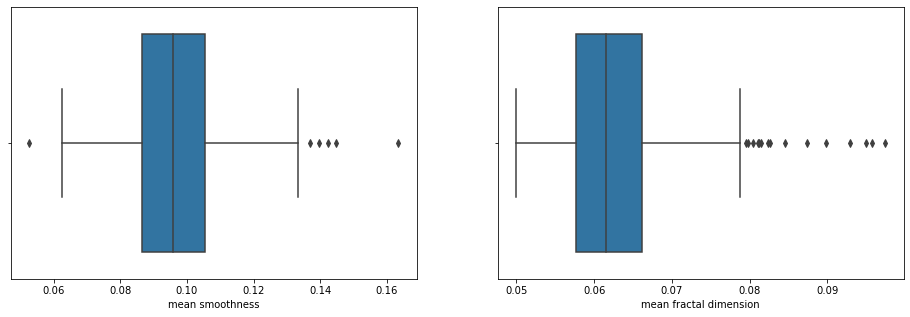

In [16]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.boxplot(breast_cancer_new_df['mean smoothness'])
plt.subplot(1,2,2)
sns.boxplot(breast_cancer_new_df['mean fractal dimension'])
plt.show()

In [17]:
columns = breast_cancer_new_df.columns
upper_limit = list(range(breast_cancer_new_df.shape[1]))
lower_limit = list(range(breast_cancer_new_df.shape[1]))
for col in range(breast_cancer_new_df.shape[1]):
    upper_limit[col] = np.mean(breast_cancer_new_df[columns[col]]) + 2*np.std(breast_cancer_new_df[columns[col]])
    lower_limit[col] = np.mean(breast_cancer_new_df[columns[col]]) - 2*np.std(breast_cancer_new_df[columns[col]])
    
for col in range(temp_df.shape[1]):   
    temp_df = temp_df[(temp_df[columns[col]] < upper_limit[col]) & (temp_df[columns[col]] > lower_limit[col])]
temp_df

,mean smoothness,mean compactness,mean symmetry,mean fractal dimension,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst smoothness,worst concavity,worst symmetry,worst fractal dimension,Cancer Type
1,0.08474,0.07864,0.1812,0.05667,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902,0
2,0.10960,0.15990,0.2069,0.05999,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758,0
4,0.10030,0.13280,0.1809,0.05883,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678,0
6,0.09463,0.10900,0.1794,0.05742,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,0.1442,0.3784,0.3063,0.08368,0
7,0.11890,0.16450,0.2196,0.07451,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,0.1654,0.2678,0.3196,0.11510,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,0.08473,0.13300,0.1454,0.06147,0.004242,0.04639,0.06578,0.01606,0.01638,0.004406,0.1026,0.3662,0.2258,0.08004,1
559,0.09261,0.10210,0.1388,0.06570,0.008200,0.02982,0.05738,0.01267,0.01488,0.004738,0.1298,0.3630,0.2112,0.08732,1
560,0.09929,0.11260,0.1537,0.06171,0.007256,0.02678,0.02071,0.01626,0.02080,0.005304,0.1241,0.1326,0.2250,0.08321,1
565,0.09780,0.10340,0.1752,0.05533,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,0.1166,0.3215,0.2572,0.06637,0


In [18]:
breast_cancer_new_df = temp_df.drop(['Cancer Type'],axis=1)
breast_cancer_new_df
cancer_type_new_df = temp_df['Cancer Type']
cancer_type_new_df

1      0
2      0
4      0
6      0
7      0
      ..
558    1
559    1
560    1
565    0
566    0
Name: Cancer Type, Length: 433, dtype: int32

## Split dataset into training and test dataset

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(breast_cancer_df, cancer_type_df, test_size=0.3)
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(breast_cancer_new_df, cancer_type_new_df, test_size=0.3, random_state=40)

## Build and train Decision Tree Model

In [22]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, Y_train)
Y_train_pred = dt_classifier.predict(X_train)
Y_test_pred = dt_classifier.predict(X_test)

## Measure the performance of the model

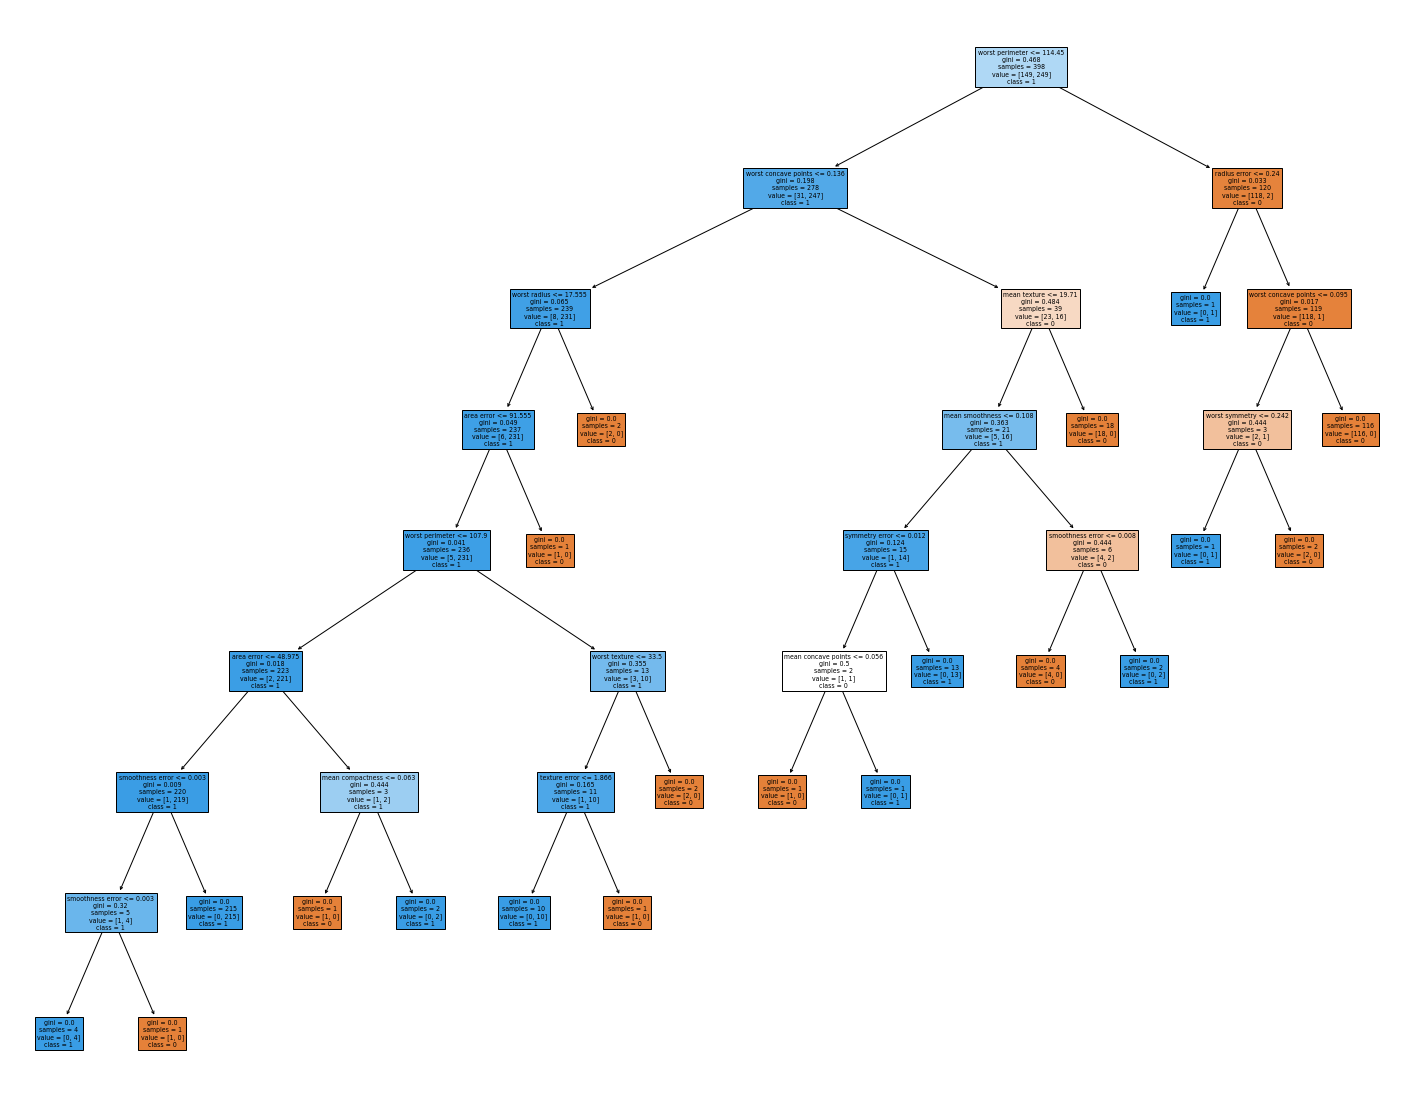

In [23]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt_classifier,
                   feature_names=X.columns,
                   class_names=["0","1","2"],
                   filled=True)

In [24]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(Y_test, Y_test_pred))
print(classification_report(Y_train, Y_train_pred))
print(classification_report(Y_test, Y_test_pred))

[[ 56   7]
 [  6 102]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       149
           1       1.00      1.00      1.00       249

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398

              precision    recall  f1-score   support

           0       0.90      0.89      0.90        63
           1       0.94      0.94      0.94       108

    accuracy                           0.92       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.92      0.92      0.92       171



In [25]:
print("Training Accuracy : ",accuracy_score(Y_train, Y_train_pred))
print("Testing Accuracy : ",accuracy_score(Y_test, Y_test_pred))

Training Accuracy :  1.0
Testing Accuracy :  0.9239766081871345


### 3. ROC curve (Receiver Operating Characteristic)

# Pre-pruning
### Hyperparameter tuning
<b>Hyperparameter tuning</b> can be used to find best fit values for parameters like ’max_depth’, ‘max_samples_leaf’, ‘max_samples_split’, etc.

In [27]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
params = {'max_depth':list(range(3,6)),
         'min_samples_split':[2,3,4,5],
         'min_samples_leaf':[1,2]}
dt_classifier = DecisionTreeClassifier()
gscv = GridSearchCV(estimator=dt_classifier, param_grid = params)
gscv.fit(X_train, Y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4, 5]})

In [28]:
gscv.best_estimator_

DecisionTreeClassifier(max_depth=4, min_samples_leaf=2)

In [29]:
model =gscv.best_estimator_
model.fit(X_train, Y_train)
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)
print("Training Accuracy : ",accuracy_score(Y_train, Y_train_pred))
print("Testing Accuracy : ",accuracy_score(Y_test, Y_test_pred))

Training Accuracy :  0.9773869346733668
Testing Accuracy :  0.935672514619883


The pruned tree definitely shows some improvement in test accuracy but still there is a scope for more.

# Post Pruning

### cost_complexity_pruning
ccp_alpha, the cost complexity parameter, parameterizes this pruning technique.

ccp_alpha gives minimum leaf value of decision tree and each ccp_alpha will create different – different classifier and choose the best out of it. More number of nodes are pruned with greater values of ccp_alpha.

In [30]:
path = dt_classifier.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.         0.00234506 0.00249003 0.00249145 0.0045683  0.00489985
 0.00495301 0.00670017 0.00775305 0.00946792 0.02827323 0.05213593
 0.32014453]


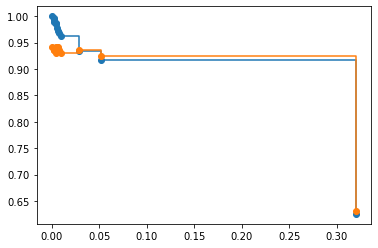

In [31]:
train_acc = []
test_acc = []
for ccp_alpha in ccp_alphas:
    dt_model = DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
    dt_model.fit(X_train, Y_train)
    Y_train_pred = dt_model.predict(X_train)
    Y_test_pred = dt_model.predict(X_test)
    train_acc.append(accuracy_score(Y_train, Y_train_pred))
    test_acc.append(accuracy_score(Y_test, Y_test_pred))
accuracy_df=pd.DataFrame()
accuracy_df['Training Accuracy'] = train_acc
accuracy_df['Testing Accuracy'] = test_acc
accuracy_df['ccp_alpha'] = ccp_alphas

plt.step(ccp_alphas, train_acc,where="post", marker='o')
plt.step(ccp_alphas, test_acc,where="post", marker='o')
plt.show()

After building the decision tree model for each alpha, we plotted Accuracy vs alpha graph. This is to know the value of alpha for which we will get maximum training accuracy.

In [32]:
id = accuracy_df['Testing Accuracy'].idxmax()
accuracy_df.loc[id]['ccp_alpha']

0.0

We can choose cpp_alpha = 0.0023 as we get the maximum Test Accuracy = 0.80 along with optimum train accuracy with it. Although our Train Accuracy has decreased to 0.86.Now, our model is more generalized and it will perform better on unseen data.

In [33]:
dt_model = DecisionTreeClassifier(random_state=0,ccp_alpha=accuracy_df.loc[id]['ccp_alpha'])
dt_model.fit(X_train, Y_train)
Y_train_pred = dt_model.predict(X_train)
Y_test_pred = dt_model.predict(X_test)
print("Training Accuracy : ",accuracy_score(Y_train, Y_train_pred))
print("Testing Accuracy : ",accuracy_score(Y_test, Y_test_pred))

Training Accuracy :  1.0
Testing Accuracy :  0.9415204678362573
